## WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [10]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df

,City
0,north bend
1,kampot
2,kloulklubed
3,ushuaia
4,tiksi
...,...
629,stutterheim
630,hualmay
631,rajec-jestrebi
632,tepetzintla


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Max Temp'] = ""
cities_df.head()   

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,north bend,,,,,,,,
1,kampot,,,,,,,,
2,kloulklubed,,,,,,,,
3,ushuaia,,,,,,,,
4,tiksi,,,,,,,,


In [12]:
#pprint result to view API format
for city in cities: 
    url = "http://api.openweathermap.org/data/2.5/weather?"
        # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    pprint(weather_json)
    break

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 43.41, 'lon': -124.22},
 'dt': 1586494066,
 'id': 5742974,
 'main': {'feels_like': 41.36,
          'humidity': 87,
          'pressure': 1020,
          'temp': 49.51,
          'temp_max': 50,
          'temp_min': 48},
 'name': 'North Bend',
 'sys': {'country': 'US',
         'id': 5239,
         'sunrise': 1586439798,
         'sunset': 1586487167,
         'type': 1},
 'timezone': -25200,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 12.75}}


In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"

for index, city in cities_df.iterrows():
    
    #get city name from dataframe
    city_name = city['City']
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city_name + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #pprint(weather_json)
    print(f"Retrieving Results for Index {index}: {city_name}.")
    #break to test first results
    
    # extract results
    try:
        cities_df.loc[index, 'Country'] = weather_json['sys']['country']
        cities_df.loc[index, 'Date'] = datetime.datetime.fromtimestamp(weather_json["dt"])
        cities_df.loc[index, 'Lat'] = weather_json['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_json['coord']['lon']
        cities_df.loc[index, 'Humidity'] = weather_json['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        cities_df.loc[index, 'Max Temp'] = weather_json['main']['temp_max']
        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Retrieving Results for Index 0: north bend.
------------
Retrieving Results for Index 1: kampot.
------------
Retrieving Results for Index 2: kloulklubed.
------------
Retrieving Results for Index 3: ushuaia.
------------
Retrieving Results for Index 4: tiksi.
------------
Retrieving Results for Index 5: saldanha.
------------
Retrieving Results for Index 6: sisian.
------------
Retrieving Results for Index 7: saint-philippe.
------------
Retrieving Results for Index 8: bahia honda.
------------
Retrieving Results for Index 9: albany.
------------
Retrieving Results for Index 10: doha.
------------
Retrieving Results for Index 11: muisne.
------------
Retrieving Results for Index 12: tuatapere.
------------
Retrieving Results for Index 13: barrow.
------------
Retrieving Results for Index 14: vaini.
------------
Retrieving Results for Index 15: hobart.
------------
Retrieving Results for Index 16: puerto ayora.
------------
Retrieving Results for Index 17: cherskiy.
------------
Retrie

Retrieving Results for Index 140: pisco.
------------
Retrieving Results for Index 141: simbahan.
------------
Retrieving Results for Index 142: rancho palos verdes.
------------
Retrieving Results for Index 143: quartz hill.
------------
Retrieving Results for Index 144: ilulissat.
------------
Retrieving Results for Index 145: yellowknife.
------------
Retrieving Results for Index 146: parrita.
------------
Retrieving Results for Index 147: kavieng.
------------
Retrieving Results for Index 148: thompson.
------------
Retrieving Results for Index 149: kaitangata.
------------
Retrieving Results for Index 150: severo-kurilsk.
------------
Retrieving Results for Index 151: floro.
------------
Retrieving Results for Index 152: chapais.
------------
Retrieving Results for Index 153: hofn.
------------
Retrieving Results for Index 154: taltal.
------------
Retrieving Results for Index 155: walvis bay.
------------
Retrieving Results for Index 156: manggar.
------------
Retrieving Results 

Retrieving Results for Index 278: gravdal.
------------
Retrieving Results for Index 279: kanchanaburi.
------------
Retrieving Results for Index 280: amderma.
Missing field/result... skipping.
------------
Retrieving Results for Index 281: norman wells.
------------
Retrieving Results for Index 282: evensk.
------------
Retrieving Results for Index 283: itoman.
------------
Retrieving Results for Index 284: nome.
------------
Retrieving Results for Index 285: lindi.
------------
Retrieving Results for Index 286: odweyne.
------------
Retrieving Results for Index 287: imbituba.
------------
Retrieving Results for Index 288: zabol.
------------
Retrieving Results for Index 289: carson city.
------------
Retrieving Results for Index 290: vavozh.
------------
Retrieving Results for Index 291: sioux lookout.
------------
Retrieving Results for Index 292: zuwarah.
------------
Retrieving Results for Index 293: mahebourg.
------------
Retrieving Results for Index 294: concarneau.
-----------

Retrieving Results for Index 415: morondava.
------------
Retrieving Results for Index 416: kapit.
------------
Retrieving Results for Index 417: cozumel.
------------
Retrieving Results for Index 418: camacha.
------------
Retrieving Results for Index 419: bilibino.
------------
Retrieving Results for Index 420: tiarei.
------------
Retrieving Results for Index 421: amazar.
------------
Retrieving Results for Index 422: fougamou.
------------
Retrieving Results for Index 423: warrington.
------------
Retrieving Results for Index 424: lata.
------------
Retrieving Results for Index 425: pacifica.
------------
Retrieving Results for Index 426: victoria.
------------
Retrieving Results for Index 427: honiara.
------------
Retrieving Results for Index 428: faya.
------------
Retrieving Results for Index 429: derac.
------------
Retrieving Results for Index 430: east london.
------------
Retrieving Results for Index 431: vila franca do campo.
------------
Retrieving Results for Index 432: 

Retrieving Results for Index 554: mana.
------------
Retrieving Results for Index 555: cedar city.
------------
Retrieving Results for Index 556: skibbereen.
------------
Retrieving Results for Index 557: tulagi.
------------
Retrieving Results for Index 558: rawson.
------------
Retrieving Results for Index 559: sitka.
------------
Retrieving Results for Index 560: dwarka.
------------
Retrieving Results for Index 561: souillac.
------------
Retrieving Results for Index 562: xam nua.
------------
Retrieving Results for Index 563: buique.
------------
Retrieving Results for Index 564: kingman.
------------
Retrieving Results for Index 565: fomboni.
------------
Retrieving Results for Index 566: paramonga.
------------
Retrieving Results for Index 567: ocos.
------------
Retrieving Results for Index 568: havelock.
------------
Retrieving Results for Index 569: karonga.
------------
Retrieving Results for Index 570: kurchum.
------------
Retrieving Results for Index 571: guerrero negro.


### Convert Raw Data to DataFrame


In [27]:
#Display the DataFrame
cities_df

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,north bend,US,2020-04-09 21:47:46,43.41,-124.22,87,90,12.75,50
1,kampot,KH,2020-04-09 21:47:49,10.62,104.18,64,91,5.95,87.06
2,kloulklubed,PW,2020-04-09 21:47:49,7.04,134.26,66,75,13.87,87.8
3,ushuaia,AR,2020-04-09 21:47:50,-54.8,-68.3,58,75,28.86,59
4,tiksi,RU,2020-04-09 21:47:50,71.69,128.87,93,87,20.89,31.57
...,...,...,...,...,...,...,...,...,...
629,stutterheim,ZA,2020-04-09 21:51:36,-32.57,27.42,93,83,3.36,59
630,hualmay,PE,2020-04-09 21:51:36,-11.1,-77.61,81,89,6.22,71.91
631,rajec-jestrebi,CZ,2020-04-09 21:51:36,49.41,16.64,65,20,4.7,48
632,tepetzintla,MX,2020-04-09 21:51:37,21.17,-97.83,91,18,3.18,73.09


In [19]:
#export to CSV
cities_df.to_csv('../output_data/cities.csv')

In [126]:
weather_data = pd.DataFrame(cities_df)
weather_data.head()

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,north bend,US,2020-04-09 21:47:46,43.41,-124.22,87,90,12.75,50
1,kampot,KH,2020-04-09 21:47:49,10.62,104.18,64,91,5.95,87.06
2,kloulklubed,PW,2020-04-09 21:47:49,7.04,134.26,66,75,13.87,87.8
3,ushuaia,AR,2020-04-09 21:47:50,-54.8,-68.3,58,75,28.86,59
4,tiksi,RU,2020-04-09 21:47:50,71.69,128.87,93,87,20.89,31.57


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [127]:
x_values = pd.to_numeric(weather_data['Lat'], downcast="float")
y_values = pd.to_numeric(weather_data['Max Temp'], downcast="float")

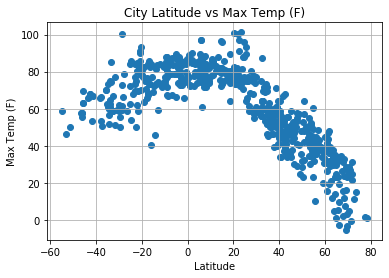

In [69]:
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temp (F)")
plt.ylabel("Max Temp (F)") ; plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("../output_data/Lat_vs_Temp.png")

# Show plot
plt.show()

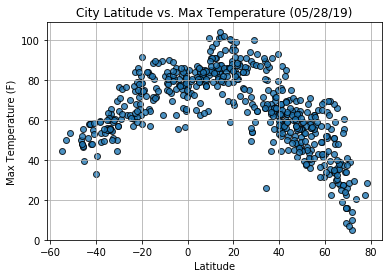

In [6]:
#example

#### Latitude vs. Humidity Plot

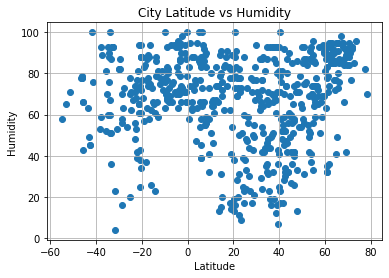

In [70]:
y_values = pd.to_numeric(weather_data['Humidity'], downcast="float")

# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity") ; plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("../output_data/Lat_vs_Temp.png")

# Show plot
plt.show()

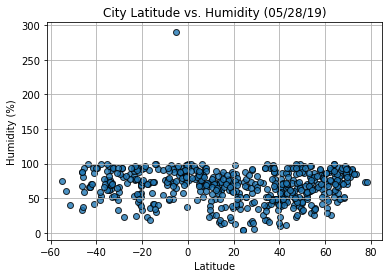

In [31]:
#example

#### Latitude vs. Cloudiness Plot

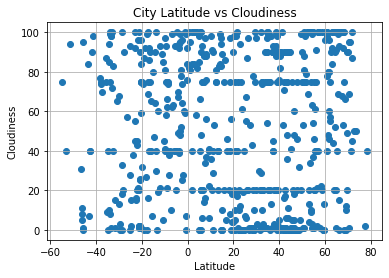

In [71]:
y_values = pd.to_numeric(weather_data['Cloudiness'], downcast="float")

# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness") ; plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("../output_data/Lat_vs_Temp.png")

# Show plot
plt.show()

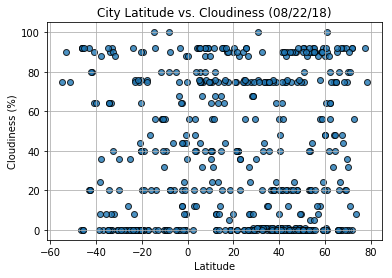

In [8]:
#example

#### Latitude vs. Wind Speed Plot

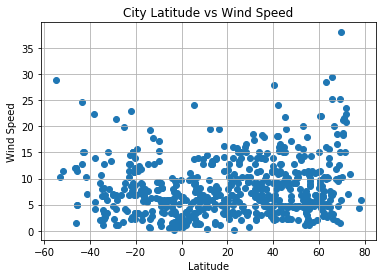

In [72]:
y_values = pd.to_numeric(weather_data['Wind Speed'], downcast="float")

# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed") ; plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("../output_data/Lat_vs_Temp.png")

# Show plot
plt.show()

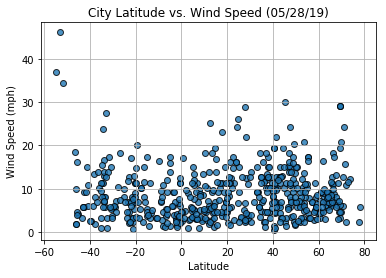

In [48]:
#example

## Linear Regression

In [141]:
# OPTIONAL: Create a function to create Linear Regression plots


In [83]:
weather_data_df= pd.DataFrame(weather_data)
weather_data_df

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,north bend,US,2020-04-09 21:47:46,43.41,-124.22,87,90,12.75,50
1,kampot,KH,2020-04-09 21:47:49,10.62,104.18,64,91,5.95,87.06
2,kloulklubed,PW,2020-04-09 21:47:49,7.04,134.26,66,75,13.87,87.8
3,ushuaia,AR,2020-04-09 21:47:50,-54.8,-68.3,58,75,28.86,59
4,tiksi,RU,2020-04-09 21:47:50,71.69,128.87,93,87,20.89,31.57
...,...,...,...,...,...,...,...,...,...
629,stutterheim,ZA,2020-04-09 21:51:36,-32.57,27.42,93,83,3.36,59
630,hualmay,PE,2020-04-09 21:51:36,-11.1,-77.61,81,89,6.22,71.91
631,rajec-jestrebi,CZ,2020-04-09 21:51:36,49.41,16.64,65,20,4.7,48
632,tepetzintla,MX,2020-04-09 21:51:37,21.17,-97.83,91,18,3.18,73.09


In [84]:
# Convert data strings to float
pd.to_numeric(weather_data_df['Lat'], downcast="float")
pd.to_numeric(weather_data_df["Lng"], downcast="float")
pd.to_numeric(weather_data_df["Humidity"], downcast="float")
pd.to_numeric(weather_data_df["Cloudiness"], downcast="float")
pd.to_numeric(weather_data_df["Wind Speed"], downcast="float")
pd.to_numeric(weather_data_df["Max Temp"], downcast="float")
weather_data_df

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,north bend,US,2020-04-09 21:47:46,43.41,-124.22,87,90,12.75,50
1,kampot,KH,2020-04-09 21:47:49,10.62,104.18,64,91,5.95,87.06
2,kloulklubed,PW,2020-04-09 21:47:49,7.04,134.26,66,75,13.87,87.8
3,ushuaia,AR,2020-04-09 21:47:50,-54.8,-68.3,58,75,28.86,59
4,tiksi,RU,2020-04-09 21:47:50,71.69,128.87,93,87,20.89,31.57
...,...,...,...,...,...,...,...,...,...
629,stutterheim,ZA,2020-04-09 21:51:36,-32.57,27.42,93,83,3.36,59
630,hualmay,PE,2020-04-09 21:51:36,-11.1,-77.61,81,89,6.22,71.91
631,rajec-jestrebi,CZ,2020-04-09 21:51:36,49.41,16.64,65,20,4.7,48
632,tepetzintla,MX,2020-04-09 21:51:37,21.17,-97.83,91,18,3.18,73.09


In [85]:
dataTypeSeries = weather_data_df.dtypes
dataTypeSeries

City          object
Country       object
Date          object
Lat           object
Lng           object
Humidity      object
Cloudiness    object
Wind Speed    object
Max Temp      object
dtype: object

In [90]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = weather_data_group.loc[pd.to_numeric(weather_data_df["Lat"]).astype(float) > 0]
south_hem_df = weather_data_group.loc[pd.to_numeric(weather_data_df["Lat"]).astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.03x + 94.07
The r-squared is: -0.899448716143872


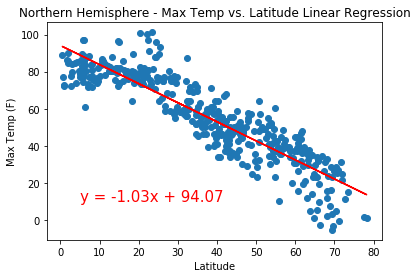

In [108]:
x_values = pd.to_numeric(north_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(north_hem_df['Max Temp'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: -0.8151657406810827


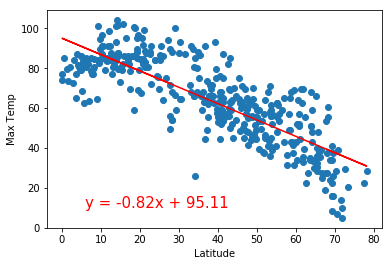

In [109]:
#example Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.49x + 83.0
The r-squared is: 0.586580453458135


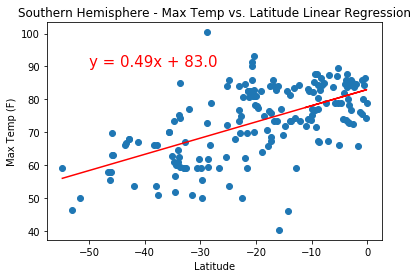

In [107]:
x_values = pd.to_numeric(south_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(south_hem_df['Max Temp'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.760263355051646


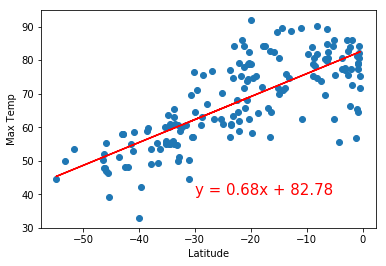

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.22x + 57.19
The r-squared is: 0.187818842766021


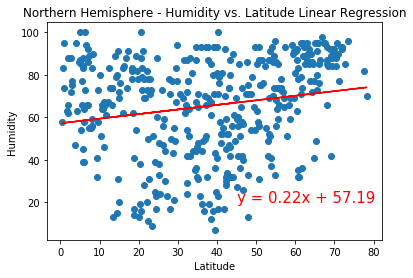

In [112]:
x_values = pd.to_numeric(north_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(north_hem_df['Humidity'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.10358336015746494


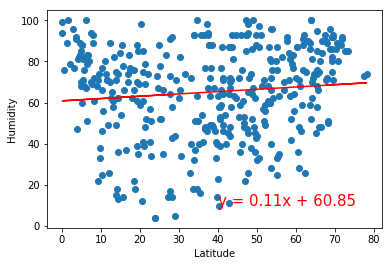

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.32x + 77.52
The r-squared is: 0.23797409387246343


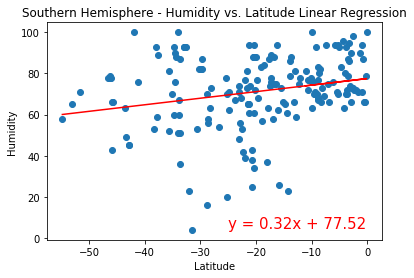

In [115]:
x_values = pd.to_numeric(south_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(south_hem_df['Humidity'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.14689473425583055


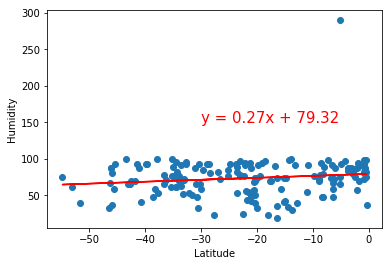

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.12x + 44.26
The r-squared is: 0.06294262129353488


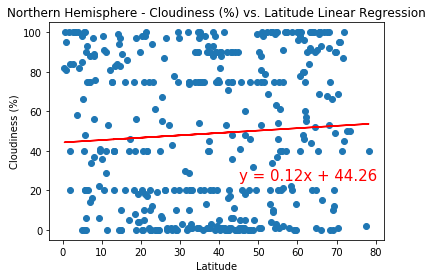

In [117]:
x_values = pd.to_numeric(north_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(north_hem_df['Cloudiness'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: -0.08733547918934018


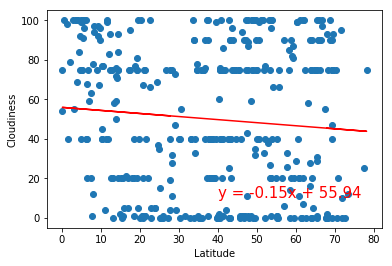

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 61.17
The r-squared is: 0.1389312439994762


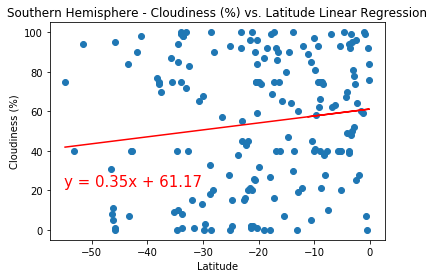

In [120]:
x_values = pd.to_numeric(south_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(south_hem_df['Cloudiness'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.21881426893991618


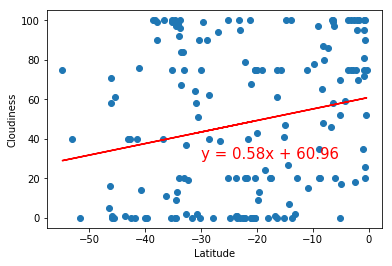

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 6.2
The r-squared is: 0.22774471014825964


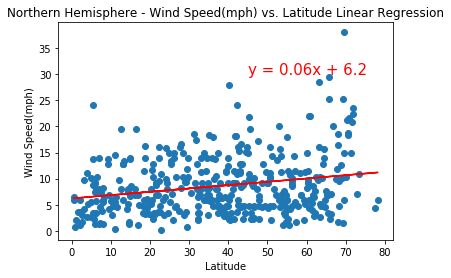

In [122]:
x_values = pd.to_numeric(north_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(north_hem_df['Wind Speed'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.1071382774388479


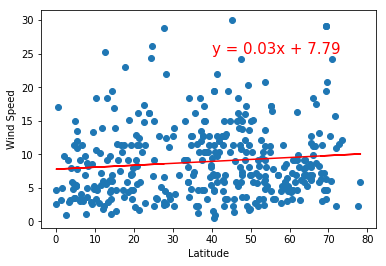

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 5.13
The r-squared is: -0.31248800421270256


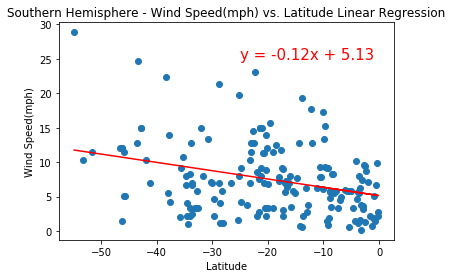

In [125]:
x_values = pd.to_numeric(south_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(south_hem_df['Wind Speed'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: -0.322483077139538


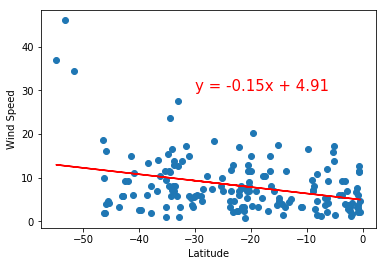